In [29]:
import pandas as pd
%store -r my_data_nan

In [30]:
for key,df in my_data_nan.iteritems():
    if 'pinterest' not in df.index:
        print key

steampowered_df
github_df
steamcommunity_df
streamable_df
redd_df
liveleak_df
patreon_df
mega_df
discordapp_df
gfycat_df


In [31]:
pi_data = pd.DataFrame()
for key,df in my_data_nan.iteritems():
    if 'pinterest' in df.index:
        new_df = df.loc['pinterest'].rename(key.replace('_df','')).to_frame().reset_index().T
        new_df.columns = new_df.loc['year_month']
        new_df = new_df.drop(['year_month']) # (1,18)
        pi_data = pi_data.append(new_df)

In [32]:
pi_data.isnull().sum()

year_month
2016-10    94
2016-11    82
2016-12    84
2017-01    59
2017-02    87
2017-03    82
2017-04    78
2017-05    87
2017-06    94
2017-07    88
2017-08    83
2017-09    87
2017-10    63
2017-11    65
2017-12    59
2018-01    57
2018-02    63
2018-03    51
dtype: int64

In [33]:
pi_data = pi_data.dropna(how='any')  

In [34]:
pi_data

year_month,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
bedbathandbeyond,0.200703,0.303216,0.318634,0.236959,0.231917,0.384342,0.389716,0.406859,0.297586,0.225532,0.252958,0.187714,0.256701,0.18754,0.125558,0.143233,0.148484,0.172811
coursehero,0.0335335,0.0743254,0.0862903,0.0634658,0.0198121,0.025219,0.0141153,0.0434961,0.0670939,0.0417814,0.0483121,0.0274255,0.0226225,0.0190401,0.0282748,0.0612746,0.0637261,0.0438844
thrillist,0.0145791,0.0136748,0.0134102,0.0179391,0.0171829,0.0123098,0.0114284,0.0183237,0.0183079,0.0341537,0.0236042,0.0197234,0.0208412,0.0284642,0.0406256,0.0312694,0.0284582,0.043713
history,0.00245952,0.0067279,0.00430199,0.00573245,0.00362729,0.00783126,0.0138863,0.00841131,0.00277437,0.00276936,0.00511871,0.0095801,0.00959816,0.00437361,0.00289941,0.00446278,0.00468185,0.00435794
retailmenot,0.0586622,0.0060341,0.0128975,0.0121209,0.0774278,0.0251739,0.012861,0.0251764,0.0233428,0.0162161,0.0150661,0.00758458,0.00358651,0.00494475,0.0101372,0.0164166,0.0153501,0.0146678
indeed,0.00535481,0.00396705,0.00295546,0.00268987,0.00192951,0.00404645,0.00262022,0.00377015,0.00400766,0.00320845,0.00291422,0.00284067,0.0042738,0.00424551,0.00424707,0.00458793,0.0042043,0.00270962
patch,0.00110126,0.00163742,0.00066448,0.00118077,0.00149986,0.00121974,0.00211065,0.000517222,0.00106208,0.00142534,0.00118192,0.000865949,0.00113245,0.00184638,0.000606562,0.000724134,0.00168155,0.00155627
jezebel,0.000893417,0.000816232,0.000383185,0.000349236,0.000418345,0.00199647,0.00201835,0.00178108,0.00157902,0.00265633,0.00235709,0.00343045,0.0013242,0.00114703,0.00232606,0.00161716,0.00306369,0.00351262
scribd,0.0202667,0.0206518,0.0242989,0.0162767,0.0201838,0.0259824,0.0299386,0.014538,0.016256,0.0199907,0.0308029,0.0388516,0.0280419,0.0294713,0.0333872,0.0154974,0.0133928,0.0247184
hulu,0.00833125,0.00840106,0.0066689,0.00989131,0.0184278,0.00822435,0.00683966,0.00886417,0.0125903,0.00994504,0.00577478,0.00568976,0.00661398,0.00710776,0.00851646,0.0113454,0.0104902,0.0102694


In [35]:
pi_avg_month = pd.DataFrame()
avg = []
for column in pi_data:
    avg.append(pi_data[column].mean()*100)

row = pd.Series(avg,pi_data.columns.values)
pi_avg_month = pi_avg_month.append([row],ignore_index=True)
pi_avg_month = pi_avg_month.transpose().reset_index().rename(index=str,columns={'index':'date',0:'avg_share'})

In [36]:
pi_avg_month

,date,avg_share
0,2016-10,3.699915
1,2016-11,3.786863
2,2016-12,3.914659
3,2017-01,3.870055
4,2017-02,3.973469
5,2017-03,4.021934
6,2017-04,4.172443
7,2017-05,3.939413
8,2017-06,3.823867
9,2017-07,4.026619


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import re
import functions_social as fs

In [38]:
pi_data1 = pi_data*100.0
mb = pi_data1.T.reset_index()

In [39]:
df_long = pd.melt(mb,'year_month', var_name = 'site',value_name ='share' )
df_long['share'] = df_long['share'].astype(np.float)
df_long

,year_month,site,share
0,2016-10,bedbathandbeyond,20.070344
1,2016-11,bedbathandbeyond,30.321618
2,2016-12,bedbathandbeyond,31.863377
3,2017-01,bedbathandbeyond,23.695861
4,2017-02,bedbathandbeyond,23.191667
5,2017-03,bedbathandbeyond,38.434172
6,2017-04,bedbathandbeyond,38.971600
7,2017-05,bedbathandbeyond,40.685892
8,2017-06,bedbathandbeyond,29.758646
9,2017-07,bedbathandbeyond,22.553207


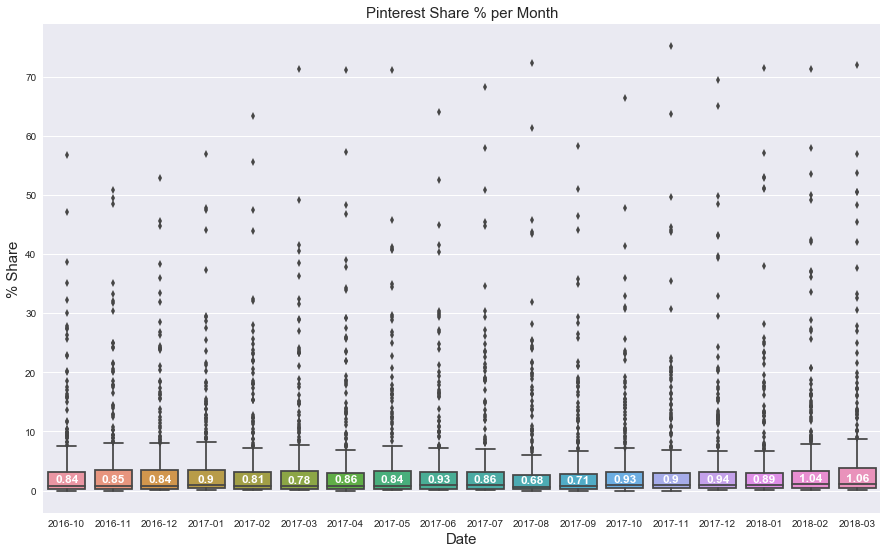

In [40]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(x='year_month',y='share',data=df_long)
#ax = sns.swarmplot(x='year_month',y='share',data=df_long)
medians = df_long.groupby(['year_month'])['share'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

#display median values
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='medium', color='w', weight='semibold')
    
#labels
ax.set_title('Pinterest Share % per Month',fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('% Share',fontsize=15)

plt.show()

In [41]:
#perc change from 2016-10 to 2017-10
pi_year_10 = pi_data[['2016-10','2017-10']]
pi_year_10['perc_change'] = (pi_data['2017-10']-pi_data['2016-10'])*100
pi_year_10 = pi_year_10.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

#perc change from 2016-11 to 2017-11
pi_year_11 = pi_data[['2016-11','2017-11']]
pi_year_11['perc_change'] = (pi_data['2017-11']-pi_data['2016-11'])*100
pi_year_11 = pi_year_11.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

pi_year_12 = pi_data[['2016-12','2017-12']]
pi_year_12['perc_change'] = (pi_data['2017-12']-pi_data['2016-12'])*100
pi_year_12 = pi_year_12.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

pi_year_1 = pi_data[['2017-01','2018-01']]
pi_year_1['perc_change'] = (pi_data['2018-01']-pi_data['2017-01'])*100
pi_year_1 = pi_year_1.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

pi_year_2 = pi_data[['2017-02','2018-02']]
pi_year_2['perc_change'] = (pi_data['2018-02']-pi_data['2017-02'])*100
pi_year_2 = pi_year_2.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

pi_year_3 = pi_data[['2017-03','2018-03']]
pi_year_3['perc_change'] = (pi_data['2018-03']-pi_data['2017-03'])*100
pi_year_3 = pi_year_3.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [42]:
pi_year_10['year_month'] = 'October'
pi_year_10 = pi_year_10.rename(columns={'year_month':'month'})
pi_year_10 = pi_year_10.iloc[:,-2:]


pi_year_11['year_month'] = 'November'
pi_year_11 = pi_year_11.rename(columns={'year_month':'month'})
pi_year_11 = pi_year_11.iloc[:,-2:]

pi_year_12['year_month'] = 'December'
pi_year_12 = pi_year_12.rename(columns={'year_month':'month'})
pi_year_12 = pi_year_12.iloc[:,-2:]

pi_year_1['year_month'] = 'January'
pi_year_1 = pi_year_1.rename(columns={'year_month':'month'})
pi_year_1 = pi_year_1.iloc[:,-2:]

pi_year_2['year_month'] = 'February'
pi_year_2 = pi_year_2.rename(columns={'year_month':'month'})
pi_year_2 = pi_year_2.iloc[:,-2:]

pi_year_3['year_month'] = 'March'
pi_year_3 = pi_year_3.rename(columns={'year_month':'month'})
pi_year_3 = pi_year_3.iloc[:,-2:]

pi_all = pi_year_10.append([pi_year_11,pi_year_12,pi_year_1,pi_year_2,pi_year_3])

pi_all['perc_change'] = pi_all['perc_change'].astype(float)

pi_all = pi_all.reset_index()
pi_all = pi_all[['perc_change','month']]

pi_all

year_month,perc_change,month
0,50.629196,October
1,25.695902,October
2,24.109342,October
3,17.709334,October
4,17.455517,October
5,15.491400,October
6,11.390220,October
7,9.991132,October
8,8.623434,October
9,7.823617,October


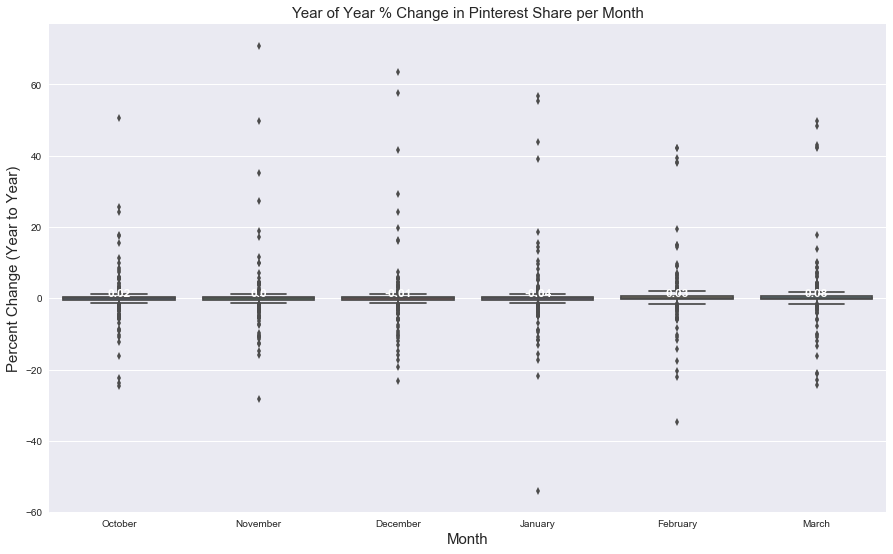

In [43]:
plt.clf()
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(x='month',y='perc_change',data=pi_all)

medians = pi_all.groupby(['month'],sort=False)['perc_change'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

#display median values
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='medium', color='w', weight='semibold')
    
#labels
ax.set_title('Year of Year % Change in Pinterest Share per Month',fontsize=15)
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Percent Change (Year to Year)',fontsize=15)
plt.show()

In [45]:
%store pi_year_3

Stored 'pi_year_3' (DataFrame)
